In [1]:
from scipy.io import wavfile
from scipy.signal import butter, lfilter
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
working_dir = os.getcwd()

#### Visualization of signal

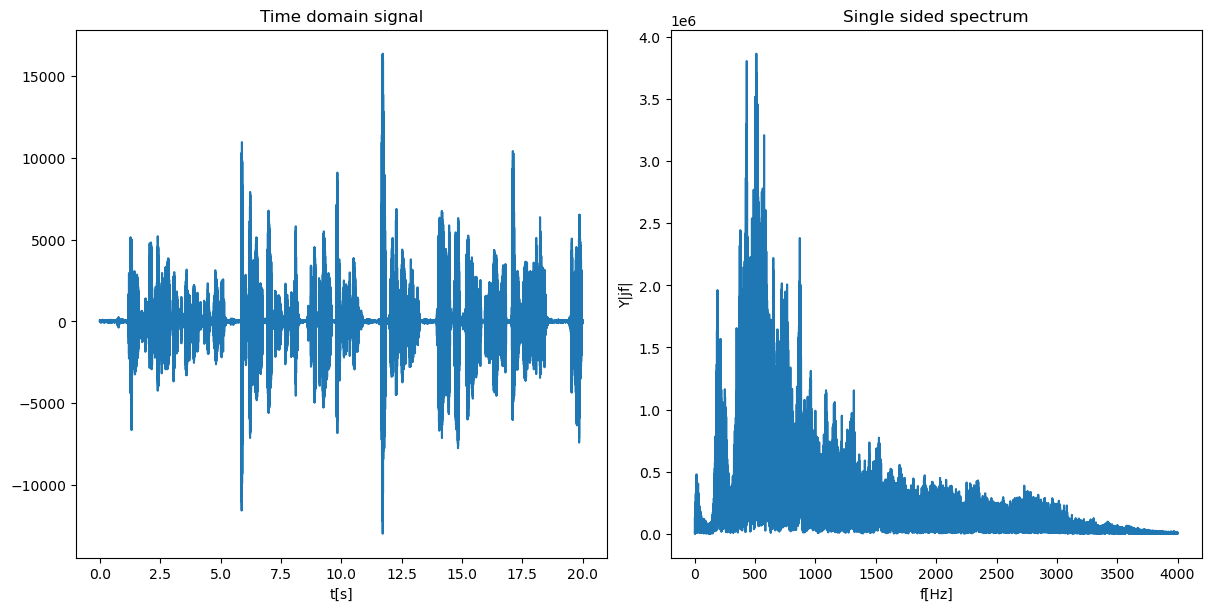

In [3]:
fs, y = wavfile.read(os.path.join(working_dir, '..', 'Data', 'initial_sample', 'milica_mono.wav'))
duration = len(y)/fs
N = len(y)
t = np.linspace(0,duration,N)

Y = abs(np.fft.fft(y,N))
Y = Y[0:N//2]
f = np.fft.fftfreq(n = N, d = 1/fs)
f = f[0:N//2]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6),
                       layout='constrained')
axs = ax.ravel()
axs[0].plot(t,y)
axs[0].title.set_text('Time domain signal')
axs[0].set_xlabel('t[s]')
axs[1].plot(f,Y)
axs[1].title.set_text('Single sided spectrum')
axs[1].set_xlabel('f[Hz]')
axs[1].set_ylabel('Y|jf|')

plt.show()


#### Filtering DC component

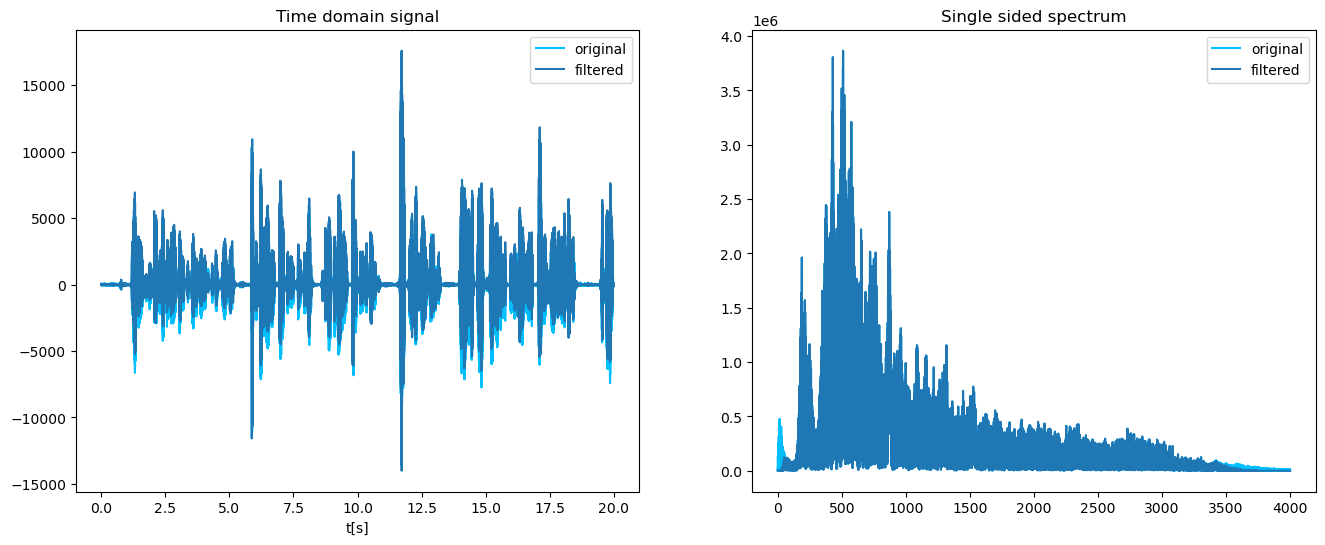

In [4]:
Wn = np.array([50/(fs/2), 3500/(fs/2)])
B,A = butter(6, Wn, btype='bandpass')
yf = lfilter(B,A,y)

plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(t,y,color='deepskyblue', label='original')
plt.plot(t, yf, label='filtered')
plt.title('Time domain signal')
plt.xlabel('t[s]')
plt.legend()

Yf = abs(np.fft.fft(yf,N))
Yf = Yf[0:N//2]

plt.subplot(122)
plt.plot(f,Y, color = 'deepskyblue', label='original')
plt.plot(f,Yf,label='filtered')
plt.title('Single sided spectrum')
plt.legend()
plt.show()

#### Choosing a window function

In [5]:
wl = np.array(np.multiply([1e-3,10e-3, 20e-3, 50e-3],fs), dtype=int)

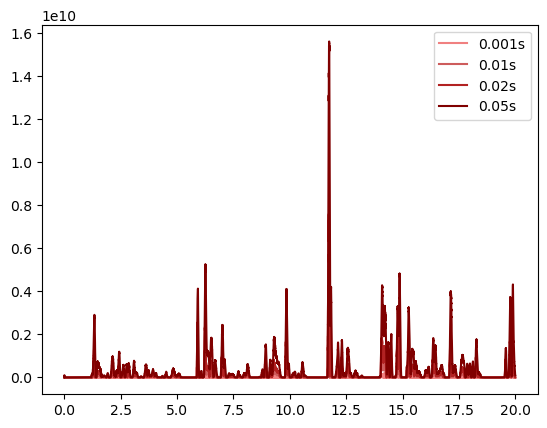

In [6]:
colors = ['lightcoral', 'indianred', 'firebrick', 'maroon']
fig,ax = plt.subplots()
for i in range(len(wl)):
    E = np.zeros(len(yf))
    for k in range(i,len(yf)):
        rng = np.arange((k-wl[i]),k)
        E[k] = np.sum(np.power(yf[rng],2))
    time = np.arange(0,E.shape[0]/fs,1/fs)
    ax.plot(time,E, color=colors[i],label=str(wl[i]/fs)+'s')
ax.legend()

#### Short time energy and zero crossing rate with 20ms window

In [7]:
wl = int(fs*20e-3)
E = np.zeros(len(yf))
ZCR = np.zeros(len(yf))

for i in range(wl, len(yf)):
    rng = np.arange(i-wl, i)
    E[i] = np.sum(np.power(yf[rng],2))
    ZCR[i] = np.sum(np.abs(np.sign(yf[rng+1])-np.sign(yf[rng])))

ZCR = ZCR/2/wl

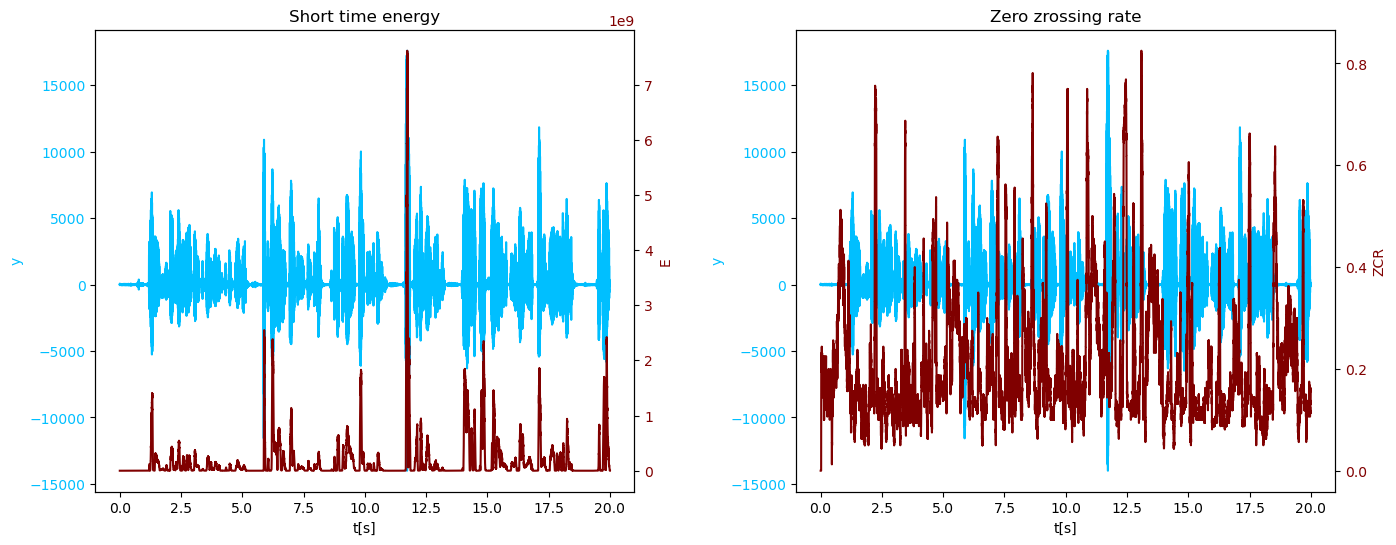

In [8]:
fig,(axs_left_1, axs_left_2) = plt.subplots(nrows=1,ncols=2,figsize=(16,6))
plt.subplots_adjust(wspace=0.3)

axs_left_1.title.set_text('Short time energy')
axs_left_1.plot(time, yf, color = 'deepskyblue')
axs_left_1.set_ylabel('y', color='deepskyblue')
axs_left_1.set_xlabel('t[s]')
axs_left_1.tick_params(axis='y', labelcolor='deepskyblue')


axs_right_1 = axs_left_1.twinx()
axs_right_1.set_ylabel('E', color='maroon')
axs_right_1.plot(time,E, color='maroon')
axs_right_1.tick_params(axis='y', labelcolor='maroon')

axs_left_2.title.set_text('Zero zrossing rate')
axs_left_2.plot(time, yf, color = 'deepskyblue')
axs_left_2.set_ylabel('y', color='deepskyblue')
axs_left_2.set_xlabel('t[s]')
axs_left_2.tick_params(axis='y', labelcolor='deepskyblue')


axs_right_2 = axs_left_2.twinx()
axs_right_2.set_ylabel('ZCR', color='maroon')
axs_right_2.plot(time,ZCR, color='maroon')
axs_right_2.tick_params(axis='y', labelcolor='maroon')

plt.show()